# COCO dataset

Given an image, let's show all bounding box annotations and their label names.

In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches # For bounding boxes

from PIL import Image

from collections import defaultdict
import json

plt.rcParams['figure.figsize'] = (15, 15)

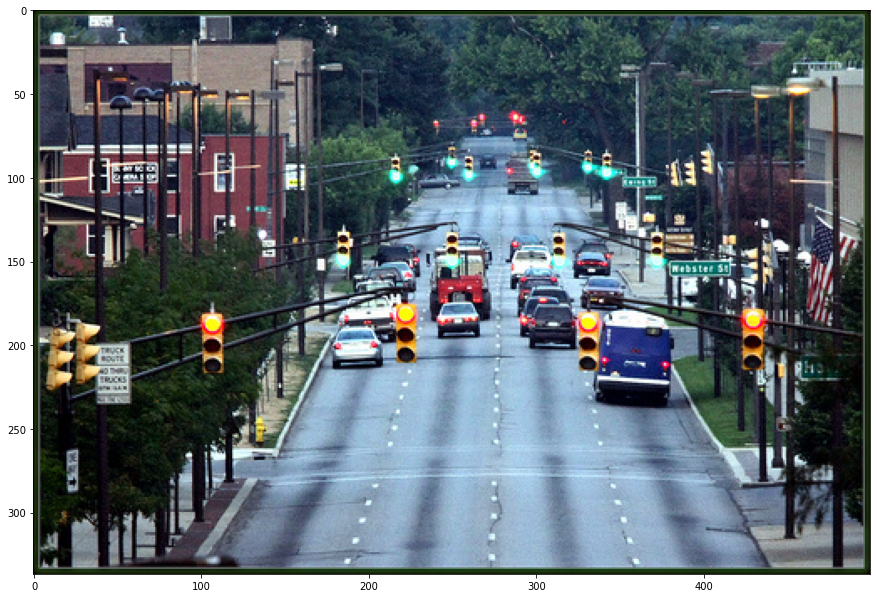

In [2]:
# Show image
image_name = "./images/train2017/000000430122.jpg"

img = Image.open(image_name)
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

## Get annotations for image

Get mapping images_id -> [annotation_objects]

And mapping category_id -> category_name

In [3]:
image_ids_annotations = defaultdict(list)

# Load annotations
path = './annotations/instances_train2017.json'
file = open(path)
anns = json.load(file)

# Add into datastructure
for ann in anns['annotations']:
    image_id = ann['image_id'] # Are integers
    image_ids_annotations[image_id].append(ann)

In [4]:
# Get mapping category_id to category name
catergory_id_to_name = dict()
for ann in anns['categories']:
    catergory_id_to_name[ann['id']] = ann['name']

# Select one image and show annotations

COCO bbox format: `x,y,w,h` where `(x,y)` is the coordinate of the top left corner of the box and `(w,h)` the width and height of the box.

We have to transform it to an appropriate format.

Matplotlib Pyplot plots a rectangle with origin in top-left corner.

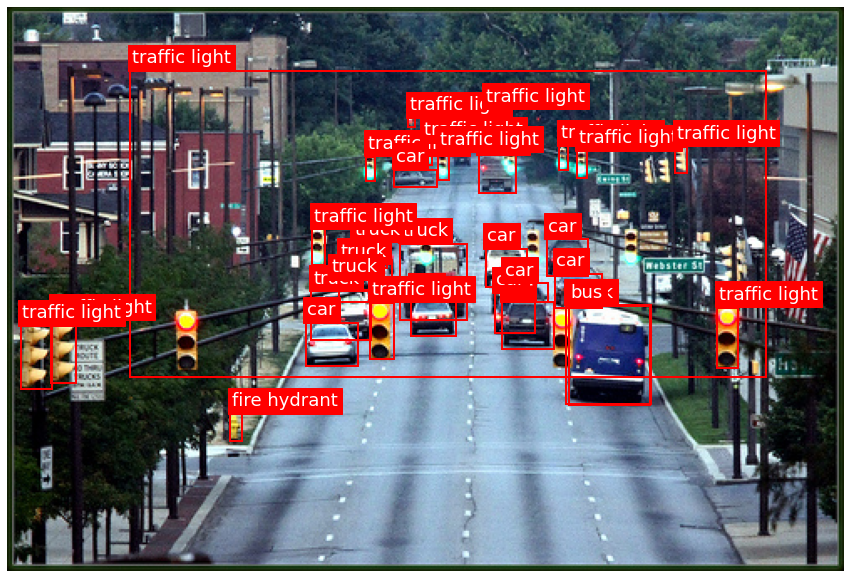

In [6]:
image_name = "./images/train2017/000000430122.jpg"
image_id = int(image_name.split("/")[-1].split(".")[0])

img = Image.open(image_name)
fig, ax = plt.subplots()

# Add code to visualize boxes and labels
image_anns = image_ids_annotations[image_id]

# Get all bounding boxes and labels
for image_ann in image_anns:
    bbox = image_ann['bbox'] # Format: x, y, h, w, origin in top left corner
    name = catergory_id_to_name[image_ann['category_id']]

    # Extract bbox coordinates
    x = float(bbox[0])
    y = float(bbox[1])
    w = float(bbox[2])
    h = float(bbox[3])

    # Add text and bbox
    plt.text(x+1, y-5, name,fontdict={'fontsize':18.0, 'fontweight':'medium','color': 'white', 'backgroundcolor':'red'})
    bb = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(bb)

ax.axis('off')
ax.imshow(img)
plt.show()